# "Прогнозирование медицинских выплат, оплачиваемых медицинской страховкой"

Я попытаюсь определить:\
1) предикторные переменные, анализируя набор данных\
2) определение корреляции между данными\
3) определение связей для прогнозирования цены страхования.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('страхование.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Колонки:\
age: возраст застрахованного\
sex: пол застрахованного, женщина, мужчина\
bmi: индекс массы тела, объективный индекс массы тела (кг / м ^ 2), использующий отношение роста к весу, в идеале от 18,5 до 24,9\
children: количество детей, охваченных медицинской страховкой / количество иждивенцев\
smoker: курение\
region: жилой район получателя в США, северо-восток, юго-восток, юго-запад, северо-запад.\
charges: индивидуальные медицинские расходы, оплачиваемые медицинской страховкой

## Анализ распределения данных

In [3]:
df.shape

(1338, 7)

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Индекс массы тела

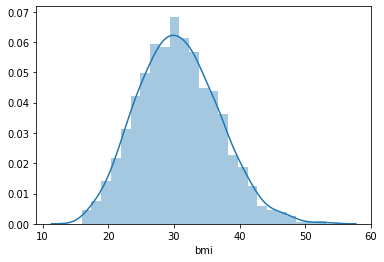

In [5]:
sns.distplot(df['bmi'])

Распределение ИМТ в данных, по-видимому, сосредоточено вокруг 30, в гауссовском нормальном распределении очень мало людей находятся на крайних сторонах.

## Возраст

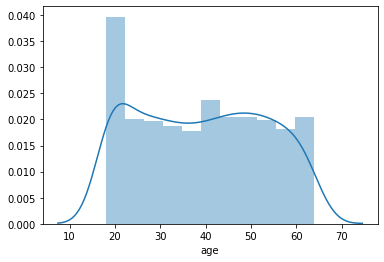

In [6]:
sns.distplot(df['age'])

## Наличие детей

In [7]:
df.groupby('children').size()

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

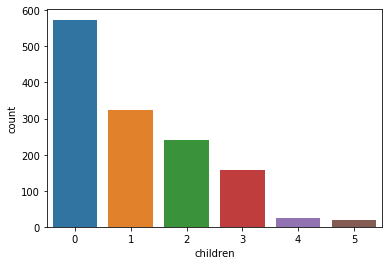

In [8]:
sns.countplot(x=df['children'])

## Медицинские расходы 

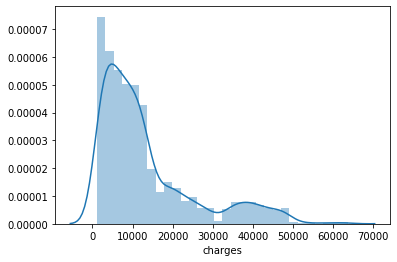

In [9]:
sns.distplot(df['charges'])

Медицинские расходы, оплачиваемые медицинской страховкой, в большинстве случаев низкие.

## Нахождение корреляции между возрастом и медицинскими расходами путем построения диаграммы рассеяния

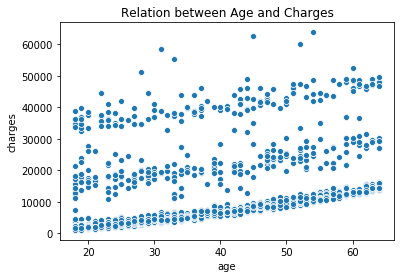

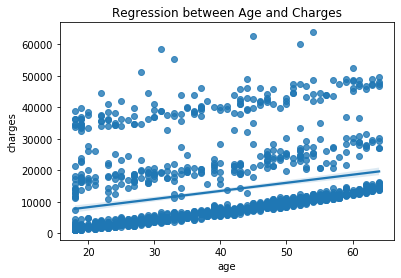

In [10]:
plt.title('Relation between Age and Charges')
sns.scatterplot(x=df['age'],y=df['charges'])
plt.show()
plt.title('Regression between Age and Charges')
sns.regplot(x=df['age'],y=df['charges'])
plt.show()

Мы можем заметить, что пожилые люди, как правило, платят немного больше, но чтобы сделать это более ясным, мы можем нарисовать регрессионную связь. Линия регрессии показывает положительную корреляцию. Следовательно, возраст играет незначительную роль в прогнозировании страховой цены.

In [11]:
df[['age', 'charges']].corr()

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


## Нахождение корреляции между ИМТ и медицинскими расходами путем построения диаграммы рассеяния.

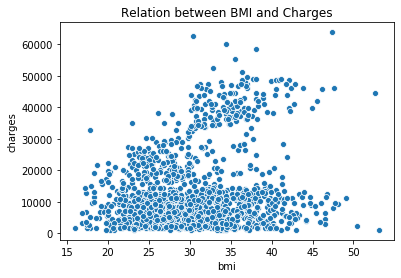

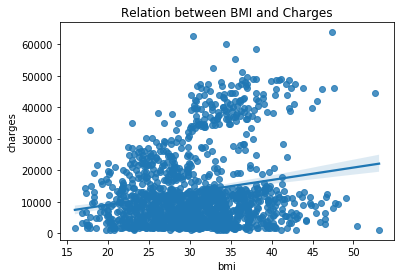

In [12]:
plt.title('Relation between BMI and Charges')
sns.scatterplot(x=df['bmi'],y=df['charges'])
plt.show()
plt.title('Relation between BMI and Charges')
sns.regplot(x=df['bmi'],y=df['charges'])
plt.show()

Диаграмма рассеяния выше показывает, что индекс массы тела (ИМТ) и медицинскими расходами положительно коррелируют, где клиенты с более высоким ИМТ, как правило, также склонны платить больше в расходах на страхование. Положительная линия регрессии доказывает это.

In [13]:
df[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


## Нахождение корреляции между курильщиками и мидицинскими расходами путем построения точечной диаграммы.

In [14]:
df.groupby('smoker').size()

smoker
no     1064
yes     274
dtype: int64

In [15]:
pd.crosstab(df['smoker'],df['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


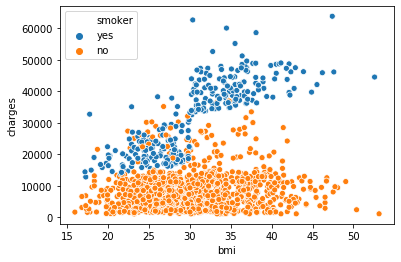

In [16]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])

Диаграмма рассеяния показывает, что в то время как некурящие, как правило, платят немного больше с увеличением ИМТ, курильщики платят гораздо больше. Чтобы еще больше подчеркнуть этот факт, я добавил две линии регрессии, соответствующие курильщикам и некурящим.

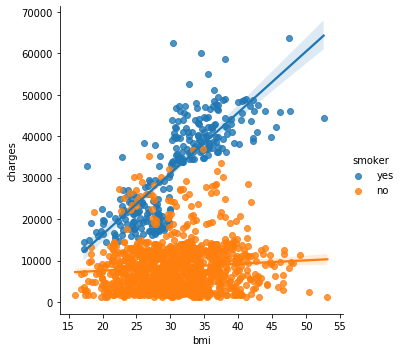

In [17]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

Мы можем заметить, что линия регрессии для курильщиков имеет гораздо более крутой наклон по сравнению с линией для некурящих.

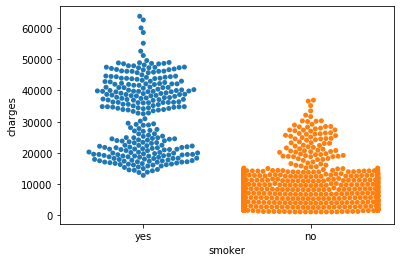

In [18]:
sns.swarmplot(x=df['smoker'],y=df['charges'])

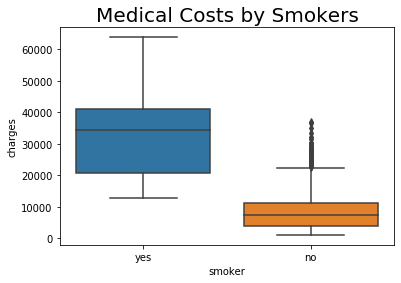

In [19]:
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Medical Costs by Smokers', fontsize = 20)
plt.show()

В среднем некурящие платят меньше, чем курильщики, и клиенты, которые платят больше всего, являются курильщиками, тогда как клиенты, которые платят меньше всего, являются некурящими. Следовательно, привычки к курению определяют размер страховых взносов.

## Нахождение корреляции между детьми и медицинскими расходами путем построения гистограммы.

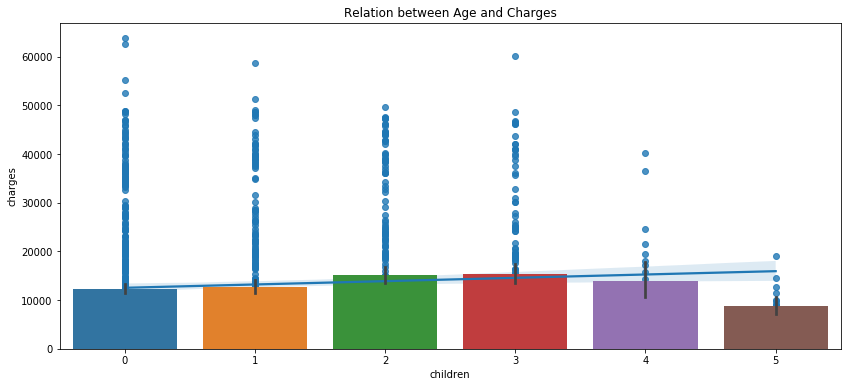

In [20]:
plt.figure(figsize=(14,6))
plt.title('Relation between Age and Charges')
sns.regplot(x=df['children'],y=df['charges'])
sns.barplot(x=df['children'], y=df['charges'])

Мы легко можем сказать, что человек, имеющий 2 и 3 детей, как правило, платит больше. Удивительно, но человек, имеющий 5 детей, платит наименьшие страховые сборы. Следовательно, определенно дети-это предикторная переменная.

## Нахождение корреляции между полом и медицинскими расходами путем построения точечной диаграммы.

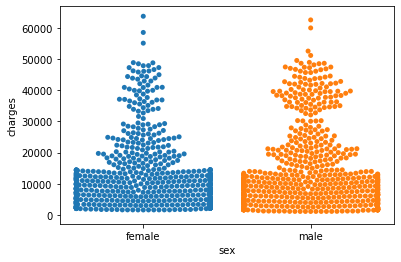

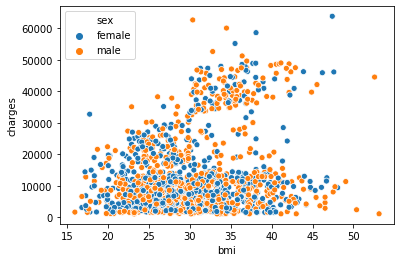

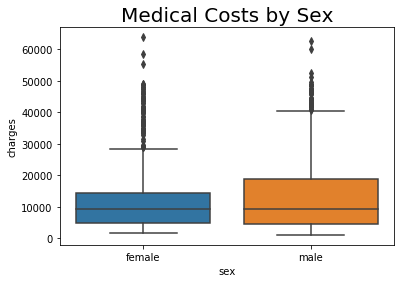

In [21]:
sns.swarmplot(x=df['sex'],y=df['charges'])
plt.show()
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['sex'])
plt.show()
sns.boxplot(x='sex',y='charges',data=df)
plt.title('Medical Costs by Sex', fontsize = 20)
plt.show()

Мы не можем найти большой разницы между стоимостью, уплаченной мужчиной, и женщиной в первой диаграмме.Гистограмма также показывает, что существует очень небольшая разница между средней стоимостью, уплаченной мужчиной и женщиной. Следовательно, пол человека не обязательно определяет медицинские выплаты.

##  Нахождение корреляции между местом проживания и медицинскими расходами путем построения диаграммы рассеяния.


In [22]:
df.groupby('region').size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

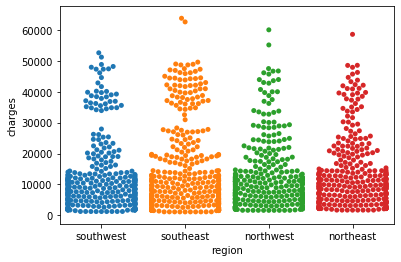

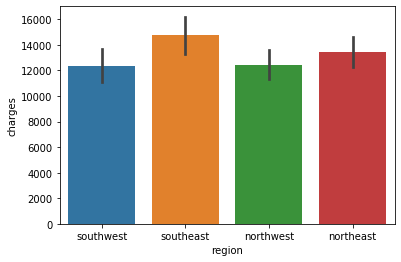

In [23]:
sns.swarmplot(x=df['region'],y=df['charges'])
plt.show()
sns.barplot(x=df['region'], y=df['charges'])
plt.show()

Первый график действительно дает некоторую информацию, но второй график ясно показывает, что регион человека важен, потому что в среднем люди с юго-востока и северо-востока, как правило, платят больше.

## Корpеляция

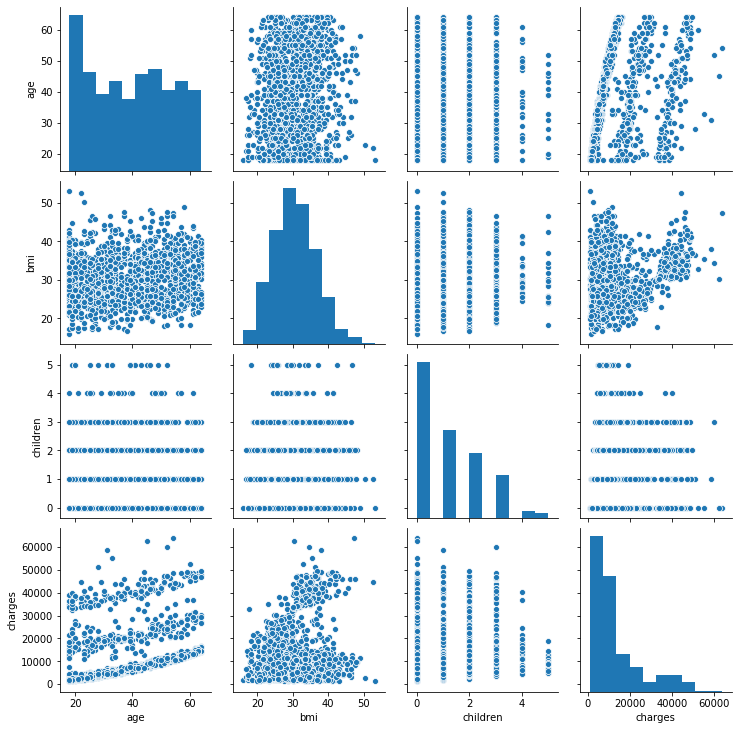

In [24]:
sns.pairplot(df)

In [25]:
from sklearn.preprocessing import OneHotEncoder
df3 = df.copy()
ohe = OneHotEncoder(drop='first')
x = pd.DataFrame(ohe.fit_transform(df3[['sex','children','smoker','region']]).toarray())
x.columns = ['Male','children_1','children_2','children_3','children_4','children_5','smoker','northwest','southeast','southwest']
df4 = pd.concat([df3.drop(['sex','children','smoker','region'],axis=1),x],axis=1)
df4.head()

,age,bmi,charges,Male,children_1,children_2,children_3,children_4,children_5,smoker,northwest,southeast,southwest
0,19,27.900,16884.92400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1725.55230,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,4449.46200,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,21984.47061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,3866.85520,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


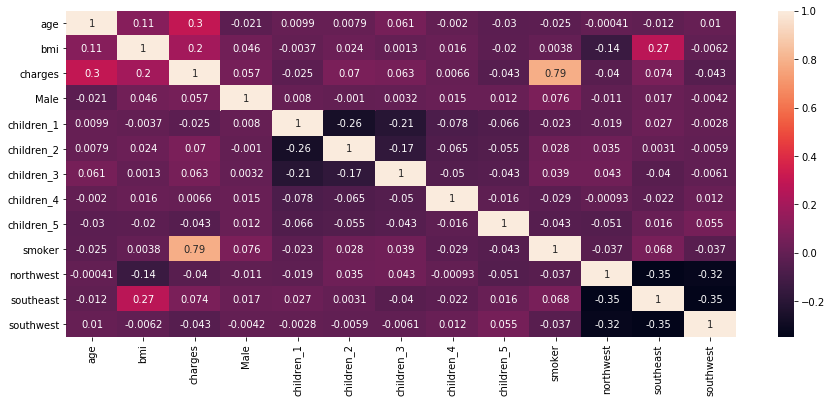

In [26]:
plt.figure(figsize=(15,6))
sns.heatmap(df4.corr(),annot=True)

Только курильщик имеет высокую корреляцию с медицинскими расходами, а другие имеют низкую или вообще не имеют корреляции

In [27]:
new_data = df4.copy()
new_data = new_data.reindex(['age', 'bmi', 'Male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker', 'northwest',
       'southeast', 'southwest','charges'],axis=1)
new_data.head()

,age,bmi,Male,children_1,children_2,children_3,children_4,children_5,smoker,northwest,southeast,southwest,charges
0,19,27.900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16884.92400
1,18,33.770,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,28,33.000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,33,22.705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,32,28.880,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3866.85520


Для анализа используем статистический метод наименьших квадратов.
Обычные наименьшие квадраты (OLS) - это метод количественной оценки различных линий регрессии. Согласно OLS, мы должны выбрать линию регрессии, которая минимизирует сумму квадратов различий между наблюдаемой зависимой переменной и прогнозируемой зависимой переменной.

In [28]:
import statsmodels.api as sm
x1 = new_data.iloc[:,:-1] # independent variable
y = new_data.iloc[:,-1] #dependent variable

In [29]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     334.7
Date:                Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:24:08   Log-Likelihood:                -13545.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1325   BIC:                         2.718e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.193e+04    993.657    -12.003      0.0

Статистика R-квадрат или, как ее иногда называют, коэффициента детерминации. Она показывает, насколько условная дисперсия модели отличается от дисперсии реальных значений. Если этот коэффициент близок к 1, то условная дисперсия модели достаточно мала и весьма вероятно, что модель неплохо описывает данные. Если же коэффициент R-квадрат сильно меньше, например, меньше 0.5, то, с большой долей уверенности модель не отражает реальное положение вещей.\
Однако, у статистики R-квадрат есть один серьезный недостаток: при увеличении числа предикторов эта статистика может только возрастать. Поэтому, может показаться, что модель с большим количеством предикторов лучше, чем модель с меньшим, даже если все новые предикторы никак не влияют на зависимую переменную. Тут можно вспомнить про принцип бритвы Оккама. Следуя ему, по возможности, стоит избавляться от лишних предикторов в модели, поскольку она становится более простой и понятной. Для этих целей была придумана статистика скорректированный R-квадрат. Она представляет собой обычный R-квадрат, но со штрафом за большое количество предикторов. Основная идея: если новые независимые переменные дают большой вклад в качество модели, значение этой статистики растет, если нет — то наоборот уменьшается.\
Скорректированный R^2=0.75 --  что означает, что 75% вариации может быть объяснено набором независимых переменных, которые мы включили.\
Значение Р является доказательством против нулевой гипотезы. Чем меньше p-значение, тем сильнее доказательство того, что вы должны отвергнуть нулевую гипотезу. для значимого уровня = 0,05\
p-значение < 0,05 --> отклонить нулевую гипотезу\
p-значение > 0.05 --> не можем отклонить нулевую гипотезу\
После выполнения OLS со значимым значением = 0,05 я получил следующие прогностические переменные:\
1) Курильщик\
2) Возраст\
3) ИМТ\
Детские особенности, региональные особенности, половые признаки не являются хорошими прогностическими переменными.\